In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [2]:
df = pd.read_csv('../data/datasetUSPS.csv', header = None, sep = ';')

In [3]:
df = df[:].astype('float64')

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,7.0,-1.000000,-1.000000,-1.000000,-0.999997,-0.999729,-0.989537,-0.860165,-0.395924,0.048299,...,0.131298,0.384728,0.433073,0.193397,-0.237439,-0.649848,-0.906359,-0.988672,-0.999475,-0.999994
1,6.0,-0.999927,-0.993644,-0.900309,-0.632621,-0.443145,-0.454436,-0.474872,-0.431176,-0.494539,...,-0.388084,-0.273639,0.001094,0.294825,0.316915,0.113494,-0.092331,-0.329390,-0.584681,-0.868793
2,5.0,-1.000000,-1.000000,-1.000000,-0.999995,-0.999986,-0.999987,-0.999990,-0.999316,-0.976299,...,-0.999778,-0.988816,-0.821857,-0.277379,0.136501,-0.247816,-0.809498,-0.988116,-0.999864,-1.000000
3,8.0,-0.999998,-0.999800,-0.994136,-0.932288,-0.673685,-0.192056,0.218820,0.337224,0.193371,...,-0.373861,0.196530,0.002823,-0.695900,-0.976372,-0.999458,-0.999996,-1.000000,-1.000000,-1.000000
4,4.0,-1.000000,-0.999971,-0.997452,-0.957499,-0.801681,-0.510623,-0.107965,0.217262,0.216431,...,0.214362,0.339240,0.458489,0.473456,0.372240,0.173322,-0.144182,-0.542254,-0.863031,-0.981978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9293,4.0,-1.000000,-0.999994,-0.999321,-0.980459,-0.794210,-0.254973,0.280592,0.447993,0.219635,...,0.440799,0.424252,0.273223,0.045554,-0.271012,-0.624501,-0.891083,-0.986282,-0.999364,-0.999993
9294,10.0,-1.000000,-0.999999,-0.999929,-0.997031,-0.958108,-0.788782,-0.422594,0.050120,0.359004,...,-0.723952,-0.045200,0.243265,-0.211727,-0.797285,-0.987273,-0.999854,-1.000000,-1.000000,-1.000000
9295,5.0,-0.999985,-0.998547,-0.966704,-0.723508,-0.155824,0.073144,-0.394682,-0.861495,-0.990816,...,0.313235,0.253947,-0.374854,-0.863926,-0.991874,-0.999908,-1.000000,-1.000000,-1.000000,-1.000000
9296,1.0,-0.999889,-0.996943,-0.962894,-0.772274,-0.303180,0.199492,0.377436,0.159035,-0.186853,...,0.422100,0.266813,0.097945,-0.142201,-0.559187,-0.867977,-0.978216,-0.998277,-0.999924,-0.999998


In [5]:
df.columns[0:]

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            247, 248, 249, 250, 251, 252, 253, 254, 255, 256],
           dtype='int64', length=257)

In [6]:
def isSparse(matrix,m,n):
    counter=0
    for i in range(m):
        for j in range(n):
            if (matrix[i][j] == 0):
                counter+=1
            
    return counter>((m*n)/2)

In [7]:
sparse = isSparse(df.values,df.shape[0],df.shape[1])

In [8]:
print("Is the dataset sparse? " +str(sparse))

Is the dataset sparse? False


In [9]:
corr=df.corr()

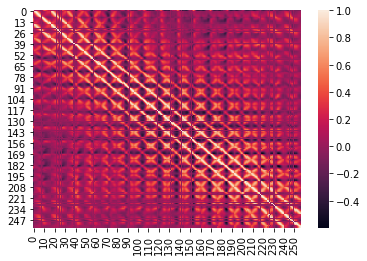

In [10]:
sns.heatmap(corr)

In [11]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df = df[selected_columns]

In [12]:
selected_columns = selected_columns[1:]

In [13]:
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [14]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [15]:
SL = 0.05
data_modeled, selected_columns = backwardElimination(X.values,Y.values, SL, selected_columns)

In [16]:
result = pd.DataFrame()
result['label'] = df.iloc[:,0]

In [17]:
result

,label
0,7.0
1,6.0
2,5.0
3,8.0
4,4.0
...,...
9293,4.0
9294,10.0
9295,5.0
9296,1.0


In [18]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)

In [19]:
data

,1,7,9,10,11,12,14,16,17,23,...,225,228,232,233,234,238,239,247,249,255
0,-1.000000,-0.860165,0.048299,-0.282151,-0.816919,-0.988564,-1.000000,-1.000000,-1.000000,-0.612719,...,-0.997299,-0.252525,0.902149,0.919526,0.819451,-0.912456,-0.993863,0.131298,0.433073,-0.999475
1,-0.999927,-0.474872,-0.494539,-0.583648,-0.568653,-0.400266,-0.086001,-0.822611,-0.999842,0.475800,...,-0.904029,-0.130600,0.611068,0.717344,0.835281,0.558652,0.170055,-0.388084,0.001094,-0.584681
2,-1.000000,-0.999990,-0.976299,-0.725917,-0.109680,0.075605,-0.875416,-0.999916,-1.000000,-0.999612,...,-1.000000,-0.999992,-0.971292,-0.761473,-0.073167,-0.980098,-0.999768,-0.999778,-0.821857,-0.999864
3,-0.999998,0.218820,0.193371,-0.065072,-0.362699,-0.634716,-0.952963,-0.999760,-0.999969,0.446062,...,-1.000000,-0.999894,0.532742,0.317457,-0.590122,-1.000000,-1.000000,-0.373861,0.002823,-1.000000
4,-1.000000,-0.107965,0.216431,-0.008529,-0.467209,-0.856598,-0.999380,-1.000000,-1.000000,0.535106,...,-0.926372,0.366693,0.562492,0.559851,0.548766,0.161487,-0.500648,0.214362,0.458489,-0.863031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9293,-1.000000,0.280592,0.219635,-0.381608,-0.849005,-0.986067,-0.999995,-1.000000,-1.000000,0.775363,...,-0.997371,0.308724,0.467334,0.522452,0.567352,-0.904794,-0.994277,0.440799,0.273223,-0.999364
9294,-1.000000,-0.422594,0.359004,0.317717,-0.062182,-0.589076,-0.992401,-0.999998,-1.000000,0.363084,...,-1.000000,-0.999997,0.360851,0.660008,0.036025,-1.000000,-1.000000,-0.723952,0.243265,-1.000000
9295,-0.999985,-0.394682,-0.990816,-0.997802,-0.998601,-0.999672,-0.999999,-1.000000,-0.999926,-0.175621,...,-1.000000,-0.979526,0.652029,-0.148132,-0.807770,-1.000000,-1.000000,0.313235,-0.374854,-1.000000
9296,-0.999889,0.377436,-0.186853,-0.523479,-0.766711,-0.933270,-0.999066,-0.999999,-0.998286,0.902491,...,-0.995211,-0.048872,0.858988,0.787121,0.630153,-0.973865,-0.996972,0.422100,0.097945,-0.999924


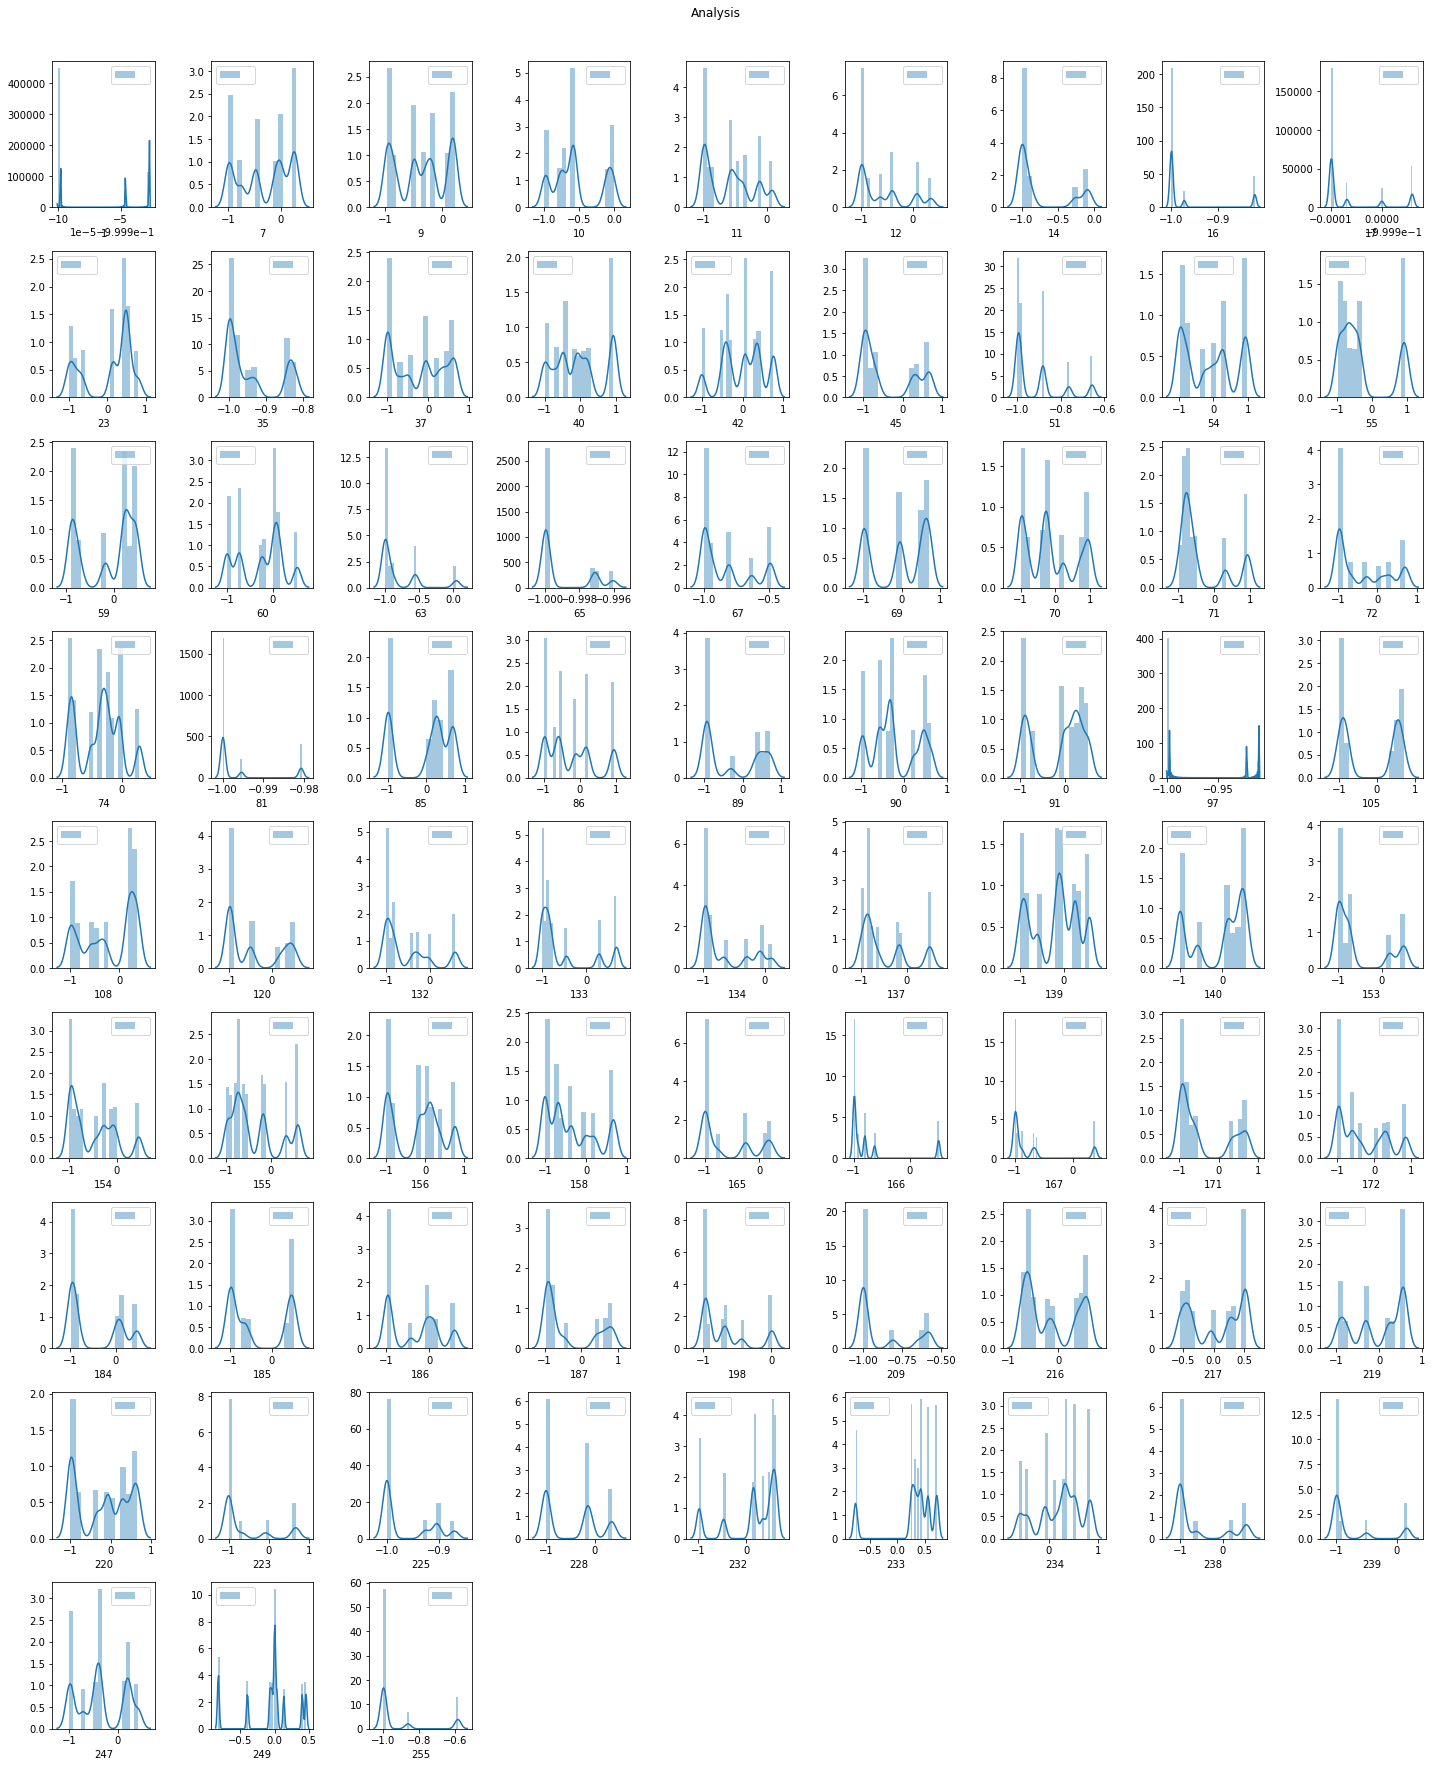

In [20]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(9, 9, j+1)
    j += 1
    sns.distplot(data[i][result['label']], label=' ')
    #sns.distplot(data[i][result['label']== 2], color='r',label=' ')
    #sns.distplot(data[i][result['label']== 1], color='b',label=' ')
    plt.legend(loc='best')
fig.suptitle('Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()